In [8]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Set ipython's max row display
pd.set_option('display.max_row', 1000)

# Set iPython's max column width to 50
pd.set_option('display.max_columns', 50)
import json
import re
import gzip
import spacy

import gensim
from gensim import corpora

import pyLDAvis
import pyLDAvis.gensim
import nltk
from nltk.probability import FreqDist
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
py.init_notebook_mode(connected=True)

In [9]:
dataset=pd.read_pickle('Toronto_Restaurants.pkl')

In [10]:
dataset.isnull().sum().sort_values(ascending=False)

hours           1900
attributes       350
text               0
categories         0
is_open            0
review_count       0
stars              0
longitude          0
latitude           0
postal_code        0
state              0
city               0
address            0
name               0
business_id        0
dtype: int64

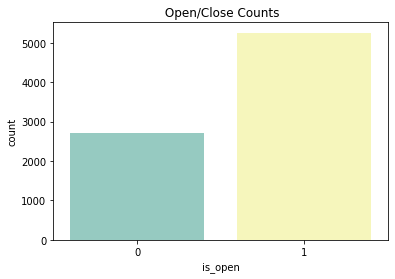

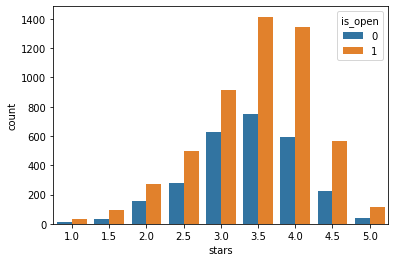

In [11]:
c = sns.countplot(x="is_open", data=dataset, palette="Set3").set_title(" Open/Close Counts")
plt.show()
plt.close()
#visualize the frequency of the ratings
sns.countplot(x='stars' ,hue="is_open",data=dataset);

In [12]:
dataset['attributes']
df_pol_ps = dataset['attributes'].apply(pd.Series)
dataset_final = pd.concat([dataset, df_pol_ps], axis = 1).drop('attributes', axis = 1)
dataset_final

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories,hours,text,WiFi,BikeParking,RestaurantsPriceRange2,BusinessParking,RestaurantsTakeOut,Caters,RestaurantsReservations,GoodForKids,RestaurantsAttire,Alcohol,OutdoorSeating,NoiseLevel,RestaurantsDelivery,HasTV,Ambience,RestaurantsGoodForGroups,Smoking,WheelchairAccessible,DogsAllowed,CoatCheck,RestaurantsTableService,HappyHour,Music,BestNights,GoodForMeal,DriveThru,GoodForDancing,ByAppointmentOnly,BusinessAcceptsCreditCards,DietaryRestrictions,AcceptsInsurance,AgesAllowed,HairSpecializesIn,RestaurantsCounterService,BusinessAcceptsBitcoin
0,NDuUMJfrWk52RA-H-OtrpA,Bolt Fresh Bar,1170 Queen Street W,Toronto,ON,M6J 1J5,43.642889,-79.425429,3.0,57,1,"Juice Bars & Smoothies, Food, Restaurants, Fas...","{'Monday': '8:0-21:0', 'Tuesday': '8:0-21:0', ...",Pretty solid vegan spot. Had a rice bowl there...,u'no',True,2,"{'garage': False, 'street': True, 'validated':...",True,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,SP_YXIEwkFPPl_9anCYmpQ,The Steady Cafe & Bar,1051 Bloor Street W,Toronto,ON,M6H 1M4,43.660494,-79.432099,3.5,29,0,"Restaurants, Nightlife, Breakfast & Brunch, Ve...","{'Tuesday': '9:0-18:0', 'Wednesday': '9:0-18:0...",Uh..I'm so sad I didn't know about this place ...,u'free',True,2,"{'garage': False, 'street': True, 'validated':...",False,True,True,False,u'casual',u'full_bar',False,u'average',False,False,"{'romantic': False, 'intimate': False, 'classy...",True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,mlHC2XcU9Bows6cnYEmRgg,Mad Crush Wine Bar,582 College Street,Toronto,ON,M6G 1B3,43.655420,-79.413352,4.0,9,0,"Restaurants, Breakfast & Brunch, Bars, Modern ...","{'Thursday': '18:0-2:0', 'Friday': '18:0-2:0',...",As a vegetarian I'm not loving the food offeri...,u'free',True,3,"{'garage': False, 'street': True, 'validated':...",True,False,True,False,'dressy',u'full_bar',True,NaN,False,False,"{'touristy': False, 'hipster': False, 'romanti...",True,u'no',True,False,False,True,False,"{'dj': False, 'background_music': False, 'no_m...","{'monday': False, 'tuesday': False, 'friday': ...","{'dessert': False, 'latenight': False, 'lunch'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,RFbMVekR8lU9tPJ8sWrwHg,Tavolino,619 Mount Pleasant Road,Toronto,ON,M4S 2M5,43.704229,-79.388230,4.0,18,1,"Italian, Restaurants",None,Great new addition to Toronto's dining scene.\...,NaN,True,2,"{'garage': False, 'street': True, 'validated':...",NaN,NaN,True,False,u'casual',u'full_bar',False,u'quiet',NaN,False,"{'romantic': False, 'intimate': False, 'classy...",True,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,"{'dessert': False, 'latenight': False, 'lunch'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NPHZkn1e-tSJAbo8Zm9rYw,Burrito Bandidos,1614 Queen Street E,Toronto,ON,M4L 1G4,43.666181,-79.316468,3.5,43,1,"Tex-Mex, Mexican, Restaurants","{'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'...","After spending the day at Woodbine Beach, I wa...",u'no',True,2,"{'garage': False, 'street': True, 'validated':...",True,False,False,True,u'casual',u'none',False,u'average',False,False,"{'romantic': False, 'intimate': False, 'classy...",True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,jtlAfuINMCYVFpjwMgy2jw,Medium Rare,5241 Dundas Street W,Toronto,ON,M9B 1A5,43.638879,-79.537632,4.0,22,0,"Grocery, Restaurants, Steakhouses, Butcher, Food","{'Tuesday': '9:0-18:0', 'Wednesday': '9:0-18:0...",Trying to find a new local butcher with grain ...,NaN,False,3,"{'garage': False, 'street': False, 'validated'...",True,NaN,NaN,NaN,u'casual',NaN,NaN,u'quiet',NaN,NaN,"{'romantic': False, 'intimate': False, 'classy...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,gyFYZV4b_9TxG1ulQNi0Ig,Paramount Fine Foods,165 East Liberty Street,Toronto,ON,M6K 3K4,43.638442,-79.417237,2.0,40,1,"Middle Eastern, Restaurants, Salad

In [13]:
dataset_final.isnull().sum().sort_values(ascending=False)
dataset_final=dataset_final.drop(columns=['RestaurantsCounterService','hours','RestaurantsAttire','Ambience','BusinessParking', 'BusinessAcceptsBitcoin','HairSpecializesIn','AcceptsInsurance','AgesAllowed','DietaryRestrictions','ByAppointmentOnly','BusinessAcceptsCreditCards','DriveThru','BestNights','Smoking','CoatCheck','Music','HappyHour','GoodForDancing','DogsAllowed','WheelchairAccessible','RestaurantsTableService','GoodForMeal','Caters','BikeParking','WiFi','NoiseLevel','Alcohol','HasTV'])

In [14]:
#Replacing true and false values with o and 1
dataset_final['RestaurantsTakeOut']=dataset_final['RestaurantsTakeOut'].replace(['True'], 1)
dataset_final['RestaurantsReservations']=dataset_final['RestaurantsReservations'].replace(['True'], 1)
dataset_final['GoodForKids']=dataset_final['GoodForKids'].replace(['True'], 1)
dataset_final['OutdoorSeating']=dataset_final['OutdoorSeating'].replace(['True'], 1)
dataset_final['RestaurantsDelivery']=dataset_final['RestaurantsDelivery'].replace(['True'], 1)
dataset_final['RestaurantsGoodForGroups']=dataset_final['RestaurantsGoodForGroups'].replace(['True'], 1)

dataset_final['RestaurantsTakeOut']=dataset_final['RestaurantsTakeOut'].replace(['False'], 0)
dataset_final['RestaurantsReservations']=dataset_final['RestaurantsReservations'].replace(['False'], 0)
dataset_final['GoodForKids']=dataset_final['GoodForKids'].replace(['False'], 0)
dataset_final['OutdoorSeating']=dataset_final['OutdoorSeating'].replace(['False'], 0)
dataset_final['RestaurantsDelivery']=dataset_final['RestaurantsDelivery'].replace(['False'], 0)
dataset_final['RestaurantsGoodForGroups']=dataset_final['RestaurantsGoodForGroups'].replace(['False'], 0)

In [15]:
dataset_final.isnull().sum().sort_values(ascending=False)

RestaurantsDelivery         1573
OutdoorSeating              1558
RestaurantsReservations     1371
GoodForKids                 1350
RestaurantsGoodForGroups    1231
RestaurantsPriceRange2      1074
RestaurantsTakeOut          1020
latitude                       0
name                           0
address                        0
city                           0
state                          0
postal_code                    0
review_count                   0
longitude                      0
stars                          0
is_open                        0
categories                     0
text                           0
business_id                    0
dtype: int64

In [16]:
dataset_final["RestaurantsGoodForGroups"]=pd.to_numeric(dataset_final["RestaurantsGoodForGroups"], errors='coerce')
dataset_final["RestaurantsDelivery"] = pd.to_numeric(dataset_final["RestaurantsDelivery"], errors='coerce')
dataset_final["OutdoorSeating"] = pd.to_numeric(dataset_final["OutdoorSeating"], errors='coerce')
dataset_final["GoodForKids"] = pd.to_numeric(dataset_final["GoodForKids"], errors='coerce')
dataset_final["RestaurantsReservations"] = pd.to_numeric(dataset_final["RestaurantsReservations"], errors='coerce')
dataset_final["RestaurantsTakeOut"] = pd.to_numeric(dataset_final["RestaurantsTakeOut"], errors='coerce')
dataset_final["RestaurantsPriceRange2"] = pd.to_numeric(dataset_final["RestaurantsPriceRange2"], errors='coerce')


In [17]:
dataset_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7967 entries, 0 to 7966
Data columns (total 20 columns):
business_id                 7967 non-null object
name                        7967 non-null object
address                     7967 non-null object
city                        7967 non-null object
state                       7967 non-null object
postal_code                 7967 non-null object
latitude                    7967 non-null float64
longitude                   7967 non-null float64
stars                       7967 non-null float64
review_count                7967 non-null int64
is_open                     7967 non-null int64
categories                  7967 non-null object
text                        7967 non-null object
RestaurantsPriceRange2      6885 non-null float64
RestaurantsTakeOut          6944 non-null float64
RestaurantsReservations     6591 non-null float64
GoodForKids                 6613 non-null float64
OutdoorSeating              6405 non-null float64
Resta

In [18]:
dataset_final['RestaurantsGoodForGroups'].fillna(dataset_final['RestaurantsGoodForGroups'].value_counts().index[0], inplace=True)
dataset_final['RestaurantsDelivery'].fillna(dataset_final['RestaurantsDelivery'].value_counts().index[0], inplace=True)
dataset_final['OutdoorSeating'].fillna(dataset_final['OutdoorSeating'].value_counts().index[0], inplace=True)
dataset_final['GoodForKids'].fillna(dataset_final['GoodForKids'].value_counts().index[0], inplace=True)
dataset_final['RestaurantsReservations'].fillna(dataset_final['RestaurantsReservations'].value_counts().index[0], inplace=True)
dataset_final['RestaurantsTakeOut'].fillna(dataset_final['RestaurantsTakeOut'].value_counts().index[0], inplace=True)
dataset_final['RestaurantsPriceRange2'].fillna(dataset_final['RestaurantsPriceRange2'].value_counts().index[0], inplace=True)

In [19]:
dataset_final.head(10)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories,text,RestaurantsPriceRange2,RestaurantsTakeOut,RestaurantsReservations,GoodForKids,OutdoorSeating,RestaurantsDelivery,RestaurantsGoodForGroups
0,NDuUMJfrWk52RA-H-OtrpA,Bolt Fresh Bar,1170 Queen Street W,Toronto,ON,M6J 1J5,43.642889,-79.425429,3.0,57,1,"Juice Bars & Smoothies, Food, Restaurants, Fas...",Pretty solid vegan spot. Had a rice bowl there...,2.0,1.0,0.0,1.0,0.0,0.0,1.0
1,SP_YXIEwkFPPl_9anCYmpQ,The Steady Cafe & Bar,1051 Bloor Street W,Toronto,ON,M6H 1M4,43.660494,-79.432099,3.5,29,0,"Restaurants, Nightlife, Breakfast & Brunch, Ve...",Uh..I'm so sad I didn't know about this place ...,2.0,0.0,1.0,0.0,0.0,0.0,1.0
2,mlHC2XcU9Bows6cnYEmRgg,Mad Crush Wine Bar,582 College Street,Toronto,ON,M6G 1B3,43.655420,-79.413352,4.0,9,0,"Restaurants, Breakfast & Brunch, Bars, Modern ...",As a vegetarian I'm not loving the food offeri...,3.0,1.0,1.0,0.0,1.0,0.0,1.0
3,RFbMVekR8lU9tPJ8sWrwHg,Tavolino,619 Mount Pleasant Road,Toronto,ON,M4S 2M5,43.704229,-79.388230,4.0,18,1,"Italian, Restaurants",Great new addition to Toronto's dining scene.\...,2.0,1.0,1.0,0.0,0.0,0.0,1.0
4,NPHZkn1e-tSJAbo8Zm9rYw,Burrito Bandidos,1614 Queen Street E,Toronto,ON,M4L 1G4,43.666181,-79.316468,3.5,43,1,"Tex-Mex, Mexican, Restaurants","After spending the day at Woodbine Beach, I wa...",2.0,1.0,0.0,1.0,0.0,0.0,1.0
5,jtlAfuINMCYVFpjwMgy2jw,Medium Rare,5241 Dundas Street W,Toronto,ON,M9B 1A5,43.638879,-79.537632,4.0,22,0,"Grocery, Restaurants, Steakhouses, Butcher, Food",Trying to find a new local butcher with grain ...,3.0,1.0,0.0,1.0,0.0,0.0,1.0
6,gyFYZV4b_9TxG1ulQNi0Ig,Paramount Fine Foods,165 East Liberty Street,Toronto,ON,M6K 3K4,43.638442,-79.417237,2.0,40,1,"Middle Eastern, Restaurants, Salad, Breakfast ...",I have eaten middle eastern food all over Toro...,2.0,1.0,1.0,1.0,1.0,1.0,1.0
7,OezwOIJ0_62Mj8MLdkGRAw,Aroma Espresso Bar,105 The Pond Road,Toronto,ON,M3J 2S5,43.769854,-79.501933,3.5,6,1,"Sandwiches, Cafes, Food, Restaurants, Coffee &...",Nice open space. Good coffee and sandwiches. O...,2.0,1.0,0.0,1.0,1.0,0.0,1.0
8,aql8K6zVoJDGRJ3P-IgtpQ,Ume Fashion Sushi,1732 Kingston Road,Toronto,ON,M1N 1S8,43.692791,-79.262630,4.5,25,1,"Sushi Bars, Restaurants","I had delivery, food came 30 minutes after cal...",2.0,1.0,1.0,1.0,0.0,1.0,1.0
9,Kxbn0XLcCgQqmkdIkhuOeQ,Not Your Mother,"1346 Queen Street, Unit 2",Toronto,ON,M6K 1L4,43.641708,-79.432192,4.0,8,1,"Desserts, Ice Cream & Frozen Yogurt, Food, Res...",I've been here three times now and every singl...,1.0,1.0,0.0,1.0,0.0,0.0,1.0


In [20]:
dataset_final.isnull().sum().sort_values(ascending=False)

RestaurantsGoodForGroups    0
RestaurantsDelivery         0
name                        0
address                     0
city                        0
state                       0
postal_code                 0
latitude                    0
longitude                   0
stars                       0
review_count                0
is_open                     0
categories                  0
text                        0
RestaurantsPriceRange2      0
RestaurantsTakeOut          0
RestaurantsReservations     0
GoodForKids                 0
OutdoorSeating              0
business_id                 0
dtype: int64

In [21]:
!python -m spacy download en

  Stored in directory: C:\Users\surbh\AppData\Local\Temp\pip-ephem-wheel-cache-mhv87uaa\wheels\48\5c\1c\15f9d02afc8221a668d2172446dd8467b20cdb9aef80a172a4
Successfully built en-core-web-sm
[+] Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
[x] Couldn't link model to 'en'
Creating a symlink in spacy/data failed. Make sure you have the required
permissions and try re-running the command as admin, or use a virtualenv. You
can still import the model as a module and call its load() method, or create the
symlink manually.
C:\Users\surbh\Anaconda3\lib\site-packages\en_core_web_sm -->
C:\Users\surbh\Anaconda3\lib\site-packages\spacy\data\en
[!] Download successful but linking failed
Creating a shortcut link for 'en' didn't work (maybe you don't have admin
permissions?), but you can still load the model via its full package name: nlp =
spacy.load('en_core_web_sm')


You do not have sufficient privilege to perform this operation.


In [22]:
!pip install PyDrive
!pip install gensim
!pip install pyldavis

  Stored in directory: C:\Users\surbh\AppData\Local\pip\Cache\wheels\fa\d2\9a\d3b6b506c2da98289e5d417215ce34b696db856643bad779f4
  Stored in directory: C:\Users\surbh\AppData\Local\pip\Cache\wheels\b8\f6\f5\b7bef1a5bc0e07ca4aa54c596b0b574c5afc07a9fddccf08f8
Successfully built PyDrive google-api-python-client


In [23]:
def freq_words(x, terms = 30):
    all_words = ' '.join([text for text in x])
    all_words = all_words.split()

    fdist = FreqDist(all_words)
    words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

    # selecting top 20 most frequent words
    d = words_df.nlargest(columns="count", n = terms) 
    plt.figure(figsize=(20,5))
    ax = sns.barplot(data=d, x= "word", y = "count")
    ax.set(ylabel = 'Count')
    plt.show()

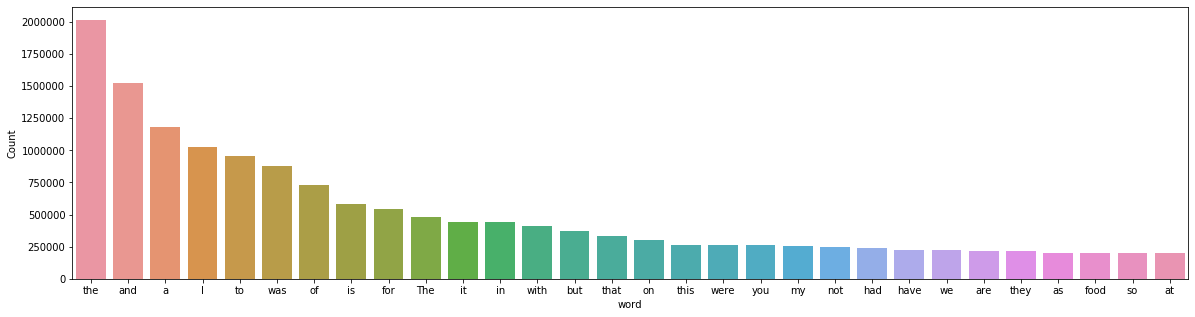

In [24]:
freq_words(dataset_final['text'])

In [25]:
# remove unwanted characters, numbers and symbols
dataset_final['text'] = dataset_final['text'].str.replace("[^a-zA-Z#]", " ")

from nltk.corpus import stopwords
stop_words = stopwords.words('english')

# function to remove stopwords
def remove_stopwords(rev):
    rev_new = " ".join([i for i in rev if i not in stop_words])
    return rev_new


In [26]:
# remove short words (length < 3)
dataset_final['text'] = dataset_final['text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))

# remove stopwords from the text
reviews = [remove_stopwords(r.split()) for r in dataset_final['text']]

# make entire text lowercase
dataset_final['text_lower'] = [r.lower() for r in reviews]


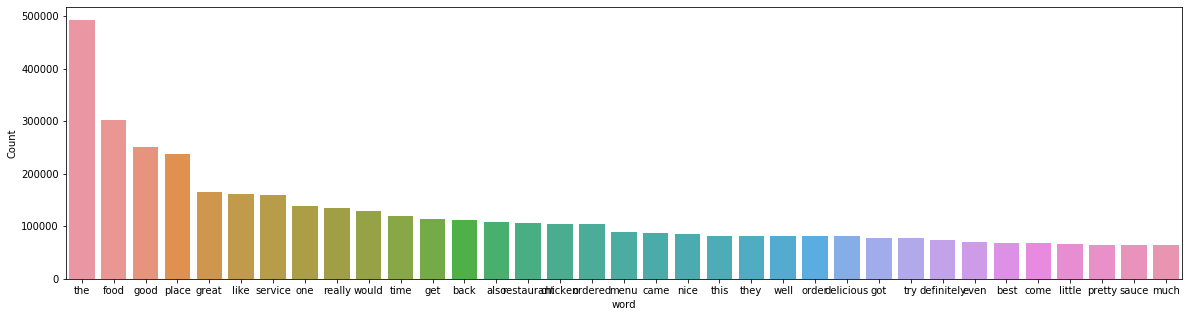

In [27]:
freq_words(dataset_final['text_lower'], 35)

In [32]:
nlp = spacy.load('en', disable=['parser', 'ner'])

def lemmatization(texts, tags=['NOUN', 'ADJ']):# filter noun and adjective
    output = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        output.append([token.lemma_ for token in doc if token.pos_ in tags])
            
    return output

In [33]:
dataset_final['tokenized_reviews'] = pd.Series(dataset_final['text_lower']).apply(lambda x: x.split())
print(dataset_final['tokenized_reviews'][1])

['sad', 'know', 'place', 'sooner', 'went', 'brunch', 'loved', 'tons', 'veg', 'vegan', 'options', 'and', 'make', 'good', 'americano', 'must', 'vegan', 'eggs', 'benedict', 'quite', 'good', 'would', 'preferred', 'came', 'potatoes', 'side', 'least', 'leave', 'brunch', 'feeling', 'crazy', 'full', 'sluggish', 'usually', 'case', 'brunch', 'sunday', 'seem', 'busy', 'sunday', 'brunch', 'maybe', 'many', 'people', 'know', 'place', 'such', 'shame', 'let', 'start', 'saying', 'love', 'place', 'going', 'try', 'make', 'bloordale', 'often', 'visit', 'first', 'visited', 'the', 'steady', 'cafe', 'brunch', 'last', 'fall', 'large', 'group', 'people', 'started', 'southern', 'sinner', 'unfortunately', 'took', 'longer', 'would', 'liked', 'arrive', 'but', 'tasted', 'yum', 'tastes', 'exactly', 'described', 'sweet', 'tea', 'booze', 'coconuts', 'since', 'tried', 'two', 'cocktails', 'southern', 'sinner', 'favourite', 'also', 'ordered', 'collard', 'stuffed', 'cornbread', 'waffle', 'chipotle', 'maple', 'syrup', 'add

In [34]:
dataset_final['lemmatized'] = lemmatization(dataset_final['tokenized_reviews'])
print(dataset_final['lemmatized']) # print lemmatized review

0       [solid, vegan, spot, rice, bowl, today, bunch,...
1       [place, brunch, ton, vegan, option, good, amer...
2       [food, offering, meat, dairy, heavy, sick, wee...
3       [great, new, addition, scene, simple, menu, gr...
4       [good, place, decent, walking, distance, share...
5       [new, local, butcher, grain, chicken, place, s...
6       [middle, eastern, food, lunch, simple, swarma,...
7       [nice, open, space, good, coffee, sandwich, lo...
8       [delivery, food, minute, worth, food, great, t...
9       [time, single, time, complaint, yummy, soft, d...
10      [worth, friend, sick, suggest, horrible, avoid...
11      [simple, tasty, wrap, corn, chowder, great, lo...
12      [coffee, breakfast, croissant, sandwich, crois...
13      [awesome, mexican, restaurant, close, work, de...
14      [excellent, value, polite, prompt, service, po...
15      [small, cozy, place, thought, bit, small, grou...
16      [time, burger, tasty, fresh, rubber, patty, pr...
17      [night

Name: lemmatized, Length: 7967, dtype: object


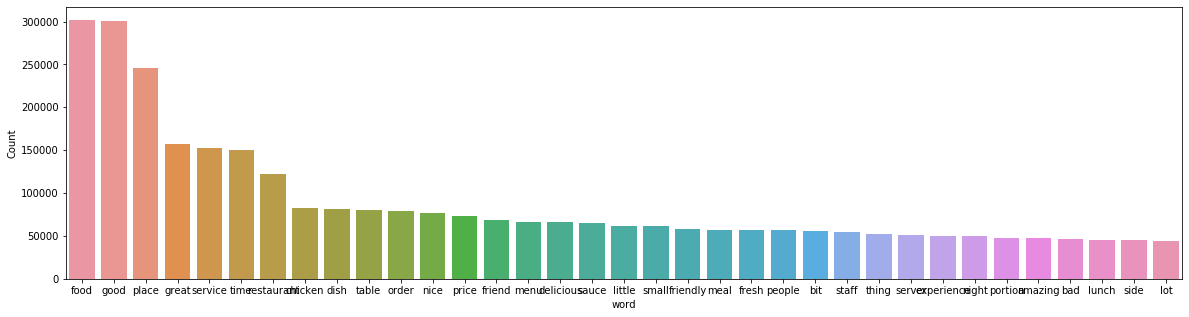

In [35]:
reviews_3 = []
for i in range(len(dataset_final['lemmatized'])):
    reviews_3.append(' '.join(dataset_final['lemmatized'][i]))

dataset_final['reviews'] = reviews_3

freq_words(dataset_final['reviews'], 35)

In [36]:
from textblob import TextBlob

def sentiment(x):
    sentiment = TextBlob(x)
    return sentiment.sentiment.polarity

In [37]:
dataset_final['review_sentiment'] = dataset_final['reviews'].apply(sentiment)

In [38]:
dataset_final.head(10)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories,text,RestaurantsPriceRange2,RestaurantsTakeOut,RestaurantsReservations,GoodForKids,OutdoorSeating,RestaurantsDelivery,RestaurantsGoodForGroups,text_lower,tokenized_reviews,lemmatized,reviews,review_sentiment
0,NDuUMJfrWk52RA-H-OtrpA,Bolt Fresh Bar,1170 Queen Street W,Toronto,ON,M6J 1J5,43.642889,-79.425429,3.0,57,1,"Juice Bars & Smoothies, Food, Restaurants, Fas...",Pretty solid vegan spot Had rice bowl there to...,2.0,1.0,0.0,1.0,0.0,0.0,1.0,pretty solid vegan spot had rice bowl today ca...,"[pretty, solid, vegan, spot, had, rice, bowl, ...","[solid, vegan, spot, rice, bowl, today, bunch,...",solid vegan spot rice bowl today bunch stuff i...,0.225389
1,SP_YXIEwkFPPl_9anCYmpQ,The Steady Cafe & Bar,1051 Bloor Street W,Toronto,ON,M6H 1M4,43.660494,-79.432099,3.5,29,0,"Restaurants, Nightlife, Breakfast & Brunch, Ve...",sad didn know about this place sooner went her...,2.0,0.0,1.0,0.0,0.0,0.0,1.0,sad know place sooner went brunch loved tons v...,"[sad, know, place, sooner, went, brunch, loved...","[place, brunch, ton, vegan, option, good, amer...",place brunch ton vegan option good americano e...,0.232457
2,mlHC2XcU9Bows6cnYEmRgg,Mad Crush Wine Bar,582 College Street,Toronto,ON,M6G 1B3,43.655420,-79.413352,4.0,9,0,"Restaurants, Breakfast & Brunch, Bars, Modern ...",vegetarian not loving the food offerings Every...,3.0,1.0,1.0,0.0,1.0,0.0,1.0,vegetarian loving food offerings everything wi...,"[vegetarian, loving, food, offerings, everythi...","[food, offering, meat, dairy, heavy, sick, wee...",food offering meat dairy heavy sick week salad...,0.296272
3,RFbMVekR8lU9tPJ8sWrwHg,Tavolino,619 Mount Pleasant Road,Toronto,ON,M4S 2M5,43.704229,-79.388230,4.0,18,1,"Italian, Restaurants",Great new addition Toronto dining scene Simple...,2.0,1.0,1.0,0.0,0.0,0.0,1.0,great new addition toronto dining scene simple...,"[great, new, addition, toronto, dining, scene,...","[great, new, addition, scene, simple, menu, gr...",great new addition scene simple menu great foo...,0.300976
4,NPHZkn1e-tSJAbo8Zm9rYw,Burrito Bandidos,1614 Queen Street E,Toronto,ON,M4L 1G4,43.666181,-79.316468,3.5,43,1,"Tex-Mex, Mexican, Restaurants",After spending the day Woodbine Beach was look...,2.0,1.0,0.0,1.0,0.0,0.0,1.0,after spending day woodbine beach looking good...,"[after, spending, day, woodbine, beach, lookin...","[good, place, decent, walking, distance, share...",good place decent walking distance share frien...,0.131694
5,jtlAfuINMCYVFpjwMgy2jw,Medium Rare,5241 Dundas Street W,Toronto,ON,M9B 1A5,43.638879,-79.537632,4.0,22,0,"Grocery, Restaurants, Steakhouses, Butcher, Food",Trying find new local butcher with grain fed c...,3.0,1.0,0.0,1.0,0.0,0.0,1.0,trying find new local butcher grain fed chicke...,"[trying, find, new, local, butcher, grain, fed...","[new, local, butcher, grain, chicken, place, s...",new local butcher grain chicken place store pe...,0.240737
6,gyFYZV4b_9TxG1ulQNi0Ig,Paramount Fine Foods,165 East Liberty Street,Toronto,ON,M6K 3K4,43.638442,-79.417237,2.0,40,1,"Middle Eastern, Restaurants, Salad, Breakfast ...",have eaten middle eastern food all over Toront...,2.0,1.0,1.0,1.0,1.0,1.0,1.0,eaten middle eastern food toronto came lunch o...,"[eaten, middle, eastern, food, toronto, came, ...","[middle, eastern, food, lunch, simple, swarma,...",middle eastern food lunch simple swarma surpri...,0.071410
7,OezwOIJ0_62Mj8MLdkGRAw,Aroma Espresso Bar,105 The Pond Road,Toronto,ON,M3J 2S5,43.769854,-79.501933,3.5,6,1,"Sandwiches, Cafes, Food, Restaurants, Coffee &...",Nice open space Good coffee and sandwiches Oft...,2.0,1.0,0.0,1.0,1.0,0.0,1.0,nice open space good coffee sandwiches often l...,"[nice, open, space, good, coffee, sandwiches, ...","[nice, open, space, good, coffee, sandwich, lo...",nice open space good coffee sandwich long line...,0.332033
8,aql8K6zVoJDGRJ3P-IgtpQ,Ume Fashion Sushi,1732 Kingston Road,Toronto,ON,M1N 1S8,43.692791,-79.262630,

In [39]:
#Split data into a training and test set with SMOTE option. The dataset is imbalanced: only about 20% of resteraunts fail inspections. Synthetic 		resampling (SMOTE) can be used to create a more balanced training set. But the danger is that the synthetic samples are too 'synthetic' and so I 		overfit the training data.  
def split_data_train_test (X,y,test_size,Use_SMOTE=True,k=4,alpha=0.7):
    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=test_size,shuffle=True)
    # Use SMOTE to oversample minority class in training data. To balance the cost of training on synthetic data with the benefit of more familiarity with the minority class, I apply a discounting factor of 0.8 to the resampling ratio that would fully equalize my two classes.  
    
    if Use_SMOTE == True:
        minority_count = y_train.sum()
        majority_count = len(y_train) - minority_count
        # We do not want LESS minority samples than the sample would produce. 
        if int(alpha * (majority_count//minority_count)) <= 1:
            res_ratio = 1
        else: 
            res_ratio = int(alpha * (majority_count//minority_count))
        X_train_SMOTE, y_train_SMOTE = SMOTE( ratio={0:majority_count, 1:int(res_ratio * minority_count)},k_neighbors=k,random_state=42).fit_sample(X_train, y_train)
        X_train_SMOTE = pd.DataFrame(X_train_SMOTE,columns=X.columns)
        return X_train_SMOTE, X_test ,y_train_SMOTE, y_test
    elif Use_SMOTE == False:
        return X_train, X_test, y_train, y_test

In [41]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
X=dataset_final[['latitude','longitude','stars','review_count','RestaurantsPriceRange2','RestaurantsTakeOut','RestaurantsReservations','GoodForKids','OutdoorSeating','RestaurantsDelivery','RestaurantsGoodForGroups','review_sentiment']]
y=dataset_final['is_open']
#X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,shuffle=True)

In [42]:
X_train, X_test, y_train, y_test=split_data_train_test(X,y,0.2,Use_SMOTE=True,k=4,alpha=0.7)

C:\Users\surbh\Anaconda3\lib\site-packages\imblearn\utils\deprecation.py:53: DeprecationWarning:

'ratio' is deprecated from 0.4 and will be removed in 0.6 for the estimator <class 'imblearn.over_sampling._smote.SMOTE'>. Use 'sampling_strategy' instead.



LR: 0.676543 (0.016488)
LDA: 0.671522 (0.010703)
KNN: 0.637502 (0.009946)
CART: 0.614910 (0.014021)
NB: 0.615286 (0.008087)
SVM: 0.674660 (0.016152)
RF: 0.654070 (0.015901)
LDA: 0.671522 (0.010703)


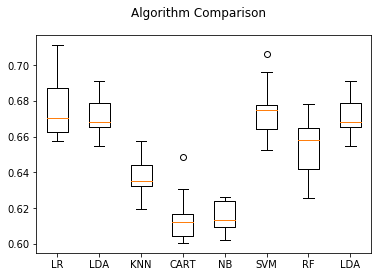

In [86]:
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import warnings
import warnings; warnings.simplefilter('ignore')
seed = 7
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('RF',RandomForestClassifier()))
models.append(('LDA',LDA()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

#The example also provides a box and whisker plot showing the spread of the accuracy scores across each cross validation fold for each algorithm.

In [87]:
# Spot-Check Algorithms
def GetBasedModel():
    basedModels = []
    basedModels.append(('LR'   , LogisticRegression()))
    basedModels.append(('LDA'  , LinearDiscriminantAnalysis()))
    basedModels.append(('KNN'  , KNeighborsClassifier()))
    basedModels.append(('CART' , DecisionTreeClassifier()))
    basedModels.append(('NB'   , GaussianNB()))
    basedModels.append(('SVM'  , SVC(probability=True)))
    basedModels.append(('RF'   , RandomForestClassifier()))
    
    return basedModels

In [88]:
def BasedLine2(X_train, y_train,models):
    # Test options and evaluation metric
    SEED=7
    num_folds = 10
    scoring = 'accuracy'

    results = []
    names = []
    for name, model in models:
        kfold = StratifiedKFold(n_splits=num_folds, random_state=SEED)
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
        
    return names, results

In [89]:
class PlotBoxR(object):
    
    
    def __Trace(self,nameOfFeature,value): 
    
        trace = go.Box(
            y=value,
            name = nameOfFeature,
            marker = dict(
                color = 'rgb(0, 128, 128)',
            )
        )
        return trace

    def PlotResult(self,names,results):
        
        data = []

        for i in range(len(names)):
            data.append(self.__Trace(names[i],results[i]))


        py.iplot(data)

In [90]:
models = GetBasedModel()
names,results = BasedLine2(X_train, y_train,models)
PlotBoxR().PlotResult(names,results)

LR: 0.673462 (0.011070)
LDA: 0.667817 (0.006006)
KNN: 0.630314 (0.010283)
CART: 0.616505 (0.016714)
NB: 0.605526 (0.018453)
SVM: 0.674251 (0.007347)
RF: 0.657460 (0.017615)


In [91]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import uniform
class RandomSearch(object):
    
    def __init__(self,X_train,y_train,model,hyperparameters):
        
        self.X_train = X_train
        self.y_train = y_train
        self.model = model
        self.hyperparameters = hyperparameters
        
    def RandomSearch(self):
        # Create randomized search 10-fold cross validation and 100 iterations
        cv = 10
        clf = RandomizedSearchCV(self.model,
                                 self.hyperparameters,
                                 random_state=1,
                                 n_iter=100,
                                 cv=cv,
                                 verbose=0,
                                 n_jobs=-1,
                                 )
        # Fit randomized search
        best_model = clf.fit(self.X_train, self.y_train)
        message = (best_model.best_score_, best_model.best_params_)
        print("Best: %f using %s" % (message))

        return best_model,best_model.best_params_
    
    def BestModelPridict(self,X_test):
        
        best_model,_ = self.RandomSearch()
        pred = best_model.predict(X_test)
        return pred
    
        

In [92]:
class GridSearch(object):
    
    def __init__(self,X_train,y_train,model,hyperparameters):
        
        self.X_train = X_train
        self.y_train = y_train
        self.model = model
        self.hyperparameters = hyperparameters
        
    def GridSearch(self):
        # Create randomized search 10-fold cross validation and 100 iterations
        cv = 10
        clf = GridSearchCV(self.model,
                                 self.hyperparameters,
                                 cv=cv,
                                 verbose=0,
                                 n_jobs=-1,
                                 )
        # Fit randomized search
        best_model = clf.fit(self.X_train, self.y_train)
        message = (best_model.best_score_, best_model.best_params_)
        print("Best: %f using %s" % (message))

        return best_model,best_model.best_params_
    
    def BestModelPridict(self,X_test):
        
        best_model,_ = self.GridSearch()
        pred = best_model.predict(X_test)
        return pred
    


In [54]:
# model
model = LogisticRegression()
# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter distribution using uniform distribution
C = uniform(loc=0, scale=4)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)
LR_RandSearch = RandomSearch(X_train,y_train,model,hyperparameters)
# LR_best_model,LR_best_params = LR_RandSearch.RandomSearch()
Prediction_LR = LR_RandSearch.BestModelPridict(X_test)

Best: 0.677075 using {'C': 0.3846890417818467, 'penalty': 'l1'}


In [55]:
def floatingDecimals(f_val, dec=3):
        prc = "{:."+str(dec)+"f}" #first cast decimal as str
    #     print(prc) #str format output is {:.3f}
        return float(prc.format(f_val))

In [56]:
print('prediction on test set is:' ,floatingDecimals((y_test == Prediction_LR).mean(),7))

prediction on test set is: 0.6875784


In [57]:
model_KNN = KNeighborsClassifier()

neighbors = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
param_grid = dict(n_neighbors=neighbors)

In [58]:
KNN_GridSearch = GridSearch(X_train,y_train,model_KNN,param_grid)
Prediction_KNN = KNN_GridSearch.BestModelPridict(X_test)
print('prediction on test set is:' ,floatingDecimals((y_test == Prediction_KNN).mean(),7))

Best: 0.658873 using {'n_neighbors': 17}
prediction on test set is: 0.6675031


In [78]:
c_values = [1.7]
kernel_values = [ 'linear' ]
param_grid = dict(C=c_values, kernel=kernel_values)
model_SVC = SVC()

In [79]:
SVC_GridSearch = GridSearch(X_train,y_train,model_SVC,param_grid)
Prediction_SVC = SVC_GridSearch.BestModelPridict(X_test)
print('prediction on test set is:' ,floatingDecimals((y_test == Prediction_SVC).mean(),7))

Best: 0.657461 using {'C': 1.7, 'kernel': 'linear'}
prediction on test set is: 0.6687578


In [74]:
n=[10]
d=[10]
param_grid = dict(n_estimators=n, max_depth=d)
model_RF= RandomForestClassifier()

In [75]:
RF_GridSearch = GridSearch(X_train,y_train,model_RF,param_grid)
Prediction_RF = RF_GridSearch.BestModelPridict(X_test)
print('prediction on test set is:' ,floatingDecimals((y_test == Prediction_RF).mean(),7))

Best: 0.679900 using {'max_depth': 10, 'n_estimators': 10}
prediction on test set is: 0.7089084


In [93]:
n=[1]
param_grid = dict(n_components= n)
model_LDA=LDA()

In [94]:
LDA_GridSearch = GridSearch(X_train,y_train,model_LDA,param_grid)
Prediction_LDA = LDA_GridSearch.BestModelPridict(X_test)
print('prediction on test set is:' ,floatingDecimals((y_test == Prediction_LDA).mean(),7))

Best: 0.667817 using {'n_components': 1}
prediction on test set is: 0.6806775


In [76]:
from scipy.stats import randint
max_depth_value = [3, None]
max_features_value =  randint(1, 4)
min_samples_leaf_value = randint(1, 4)
criterion_value = ["gini", "entropy"]
param_grid = dict(max_depth = max_depth_value,
                  max_features = max_features_value,
                  min_samples_leaf = min_samples_leaf_value,
                  criterion = criterion_value)

In [77]:
model_CART = DecisionTreeClassifier()
CART_RandSearch = RandomSearch(X_train,y_train,model_CART,param_grid)
Prediction_CART = CART_RandSearch.BestModelPridict(X_test)
print('prediction on test set is:' ,floatingDecimals((y_test == Prediction_CART).mean(),7))

Best: 0.666562 using {'criterion': 'gini', 'max_depth': 3, 'max_features': 3, 'min_samples_leaf': 2}
prediction on test set is: 0.674404


In [80]:
print("Confusion Matrix for Logistic Regression")
print(confusion_matrix(y_test,Prediction_LR))
print("Score:",round(accuracy_score(y_test,Prediction_LR)*100,2))
print("Classification Report:",classification_report(y_test,Prediction_LR))

Confusion Matrix for Logistic Regression
[[  82  446]
 [  52 1014]]
Score: 68.76
Classification Report:               precision    recall  f1-score   support

           0       0.61      0.16      0.25       528
           1       0.69      0.95      0.80      1066

    accuracy                           0.69      1594
   macro avg       0.65      0.55      0.53      1594
weighted avg       0.67      0.69      0.62      1594



In [81]:
print("Confusion Matrix for KNN Classifier:")
print(confusion_matrix(y_test,Prediction_KNN))
print("Score:",round(accuracy_score(y_test,Prediction_KNN)*100,2))
print("Classification Report:",classification_report(y_test,Prediction_KNN))

Confusion Matrix for KNN Classifier:
[[143 385]
 [145 921]]
Score: 66.75
Classification Report:               precision    recall  f1-score   support

           0       0.50      0.27      0.35       528
           1       0.71      0.86      0.78      1066

    accuracy                           0.67      1594
   macro avg       0.60      0.57      0.56      1594
weighted avg       0.64      0.67      0.64      1594



In [82]:
print("Confusion Matrix for SVM Classifier:")
print(confusion_matrix(y_test,Prediction_SVC))
print("Score:",round(accuracy_score(y_test,Prediction_SVC)*100,2))
print("Classification Report:",classification_report(y_test,Prediction_SVC))

Confusion Matrix for SVM Classifier:
[[   0  528]
 [   0 1066]]
Score: 66.88
Classification Report:               precision    recall  f1-score   support

           0       0.00      0.00      0.00       528
           1       0.67      1.00      0.80      1066

    accuracy                           0.67      1594
   macro avg       0.33      0.50      0.40      1594
weighted avg       0.45      0.67      0.54      1594



In [83]:
print("Confusion Matrix for Random Forest Classifier:")
print(confusion_matrix(y_test,Prediction_RF))
print("Score:",round(accuracy_score(y_test,Prediction_RF)*100,2))
print("Classification Report:",classification_report(y_test,Prediction_RF))

Confusion Matrix for Random Forest Classifier:
[[147 381]
 [ 83 983]]
Score: 70.89
Classification Report:               precision    recall  f1-score   support

           0       0.64      0.28      0.39       528
           1       0.72      0.92      0.81      1066

    accuracy                           0.71      1594
   macro avg       0.68      0.60      0.60      1594
weighted avg       0.69      0.71      0.67      1594



In [84]:
print("Confusion Matrix for Decision Tree Classifier:")
print(confusion_matrix(y_test,Prediction_CART))
print("Score:",round(accuracy_score(y_test,Prediction_CART)*100,2))
print("Classification Report:",classification_report(y_test,Prediction_CART))

Confusion Matrix for Decision Tree Classifier:
[[  22  506]
 [  13 1053]]
Score: 67.44
Classification Report:               precision    recall  f1-score   support

           0       0.63      0.04      0.08       528
           1       0.68      0.99      0.80      1066

    accuracy                           0.67      1594
   macro avg       0.65      0.51      0.44      1594
weighted avg       0.66      0.67      0.56      1594



In [95]:
print("Confusion Matrix for LDA Classifier:")
print(confusion_matrix(y_test,Prediction_LDA))
print("Score:",round(accuracy_score(y_test,Prediction_LDA)*100,2))
print("Classification Report:",classification_report(y_test,Prediction_LDA))

Confusion Matrix for LDA Classifier:
[[  36  492]
 [  17 1049]]
Score: 68.07
Classification Report:               precision    recall  f1-score   support

           0       0.68      0.07      0.12       528
           1       0.68      0.98      0.80      1066

    accuracy                           0.68      1594
   macro avg       0.68      0.53      0.46      1594
weighted avg       0.68      0.68      0.58      1594

